<a href="https://colab.research.google.com/github/anvishah1/ML-Lab/blob/main/ML_lab_ass_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
print(df.shape)
print(df.columns)

(159, 7)
Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


FORMATING DATA SET

In [ ]:
D = df.iloc[:,1:]
D.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
Y = D.iloc[:,0].values #target weight values
X = D.iloc[:,1:].values # features

print(Y.shape)
print(X.shape)

(159,)
(159, 5)


random dataset

In [ ]:
def random_dataset( X,Y,seed =42):
  np.random.seed(seed)
  indices= np.random.permutation(len(X))
  return X[indices],Y[indices]

X_Dr, Y_Dr = random_dataset(X,Y)

organising the dataset

In [ ]:
X_train = X_Dr[:100]
Y_train = Y_Dr[:100]

X_val = X_Dr[100:130]
Y_val = Y_Dr[100:130]

X_test = X_Dr[130:]
Y_test= Y_Dr[130:]

In [ ]:
print("D1 (Train):", X_train.shape, Y_train.shape)
print("D2 (Val):", X_val.shape, Y_val.shape)
print("D3 (Test):", X_test.shape, Y_test.shape)

D1 (Train): (100, 5) (100,)
D2 (Val): (30, 5) (30,)
D3 (Test): (29, 5) (29,)


In [ ]:
# def normalize_features(X):
#     """
#     Normalize features using Z-score normalization
#     Returns: normalized X, mean, std
#     """
#     mean = np.mean(X, axis=0)
#     std = np.std(X, axis=0)
#     X_normalized = (X - mean) / std
#     return X_normalized, mean, std

# def normalize_target(Y):
#     """
#     Normalize target variable
#     Returns: normalized Y, mean, std
#     """
#     mean = np.mean(Y)
#     std = np.std(Y)
#     Y_normalized = (Y - mean) / std
#     return Y_normalized, mean, std

1. SCATTER PLOT OF Y WITH ALL 5 FEATURES

In [ ]:
features=D.columns[1:]
print(features)

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')


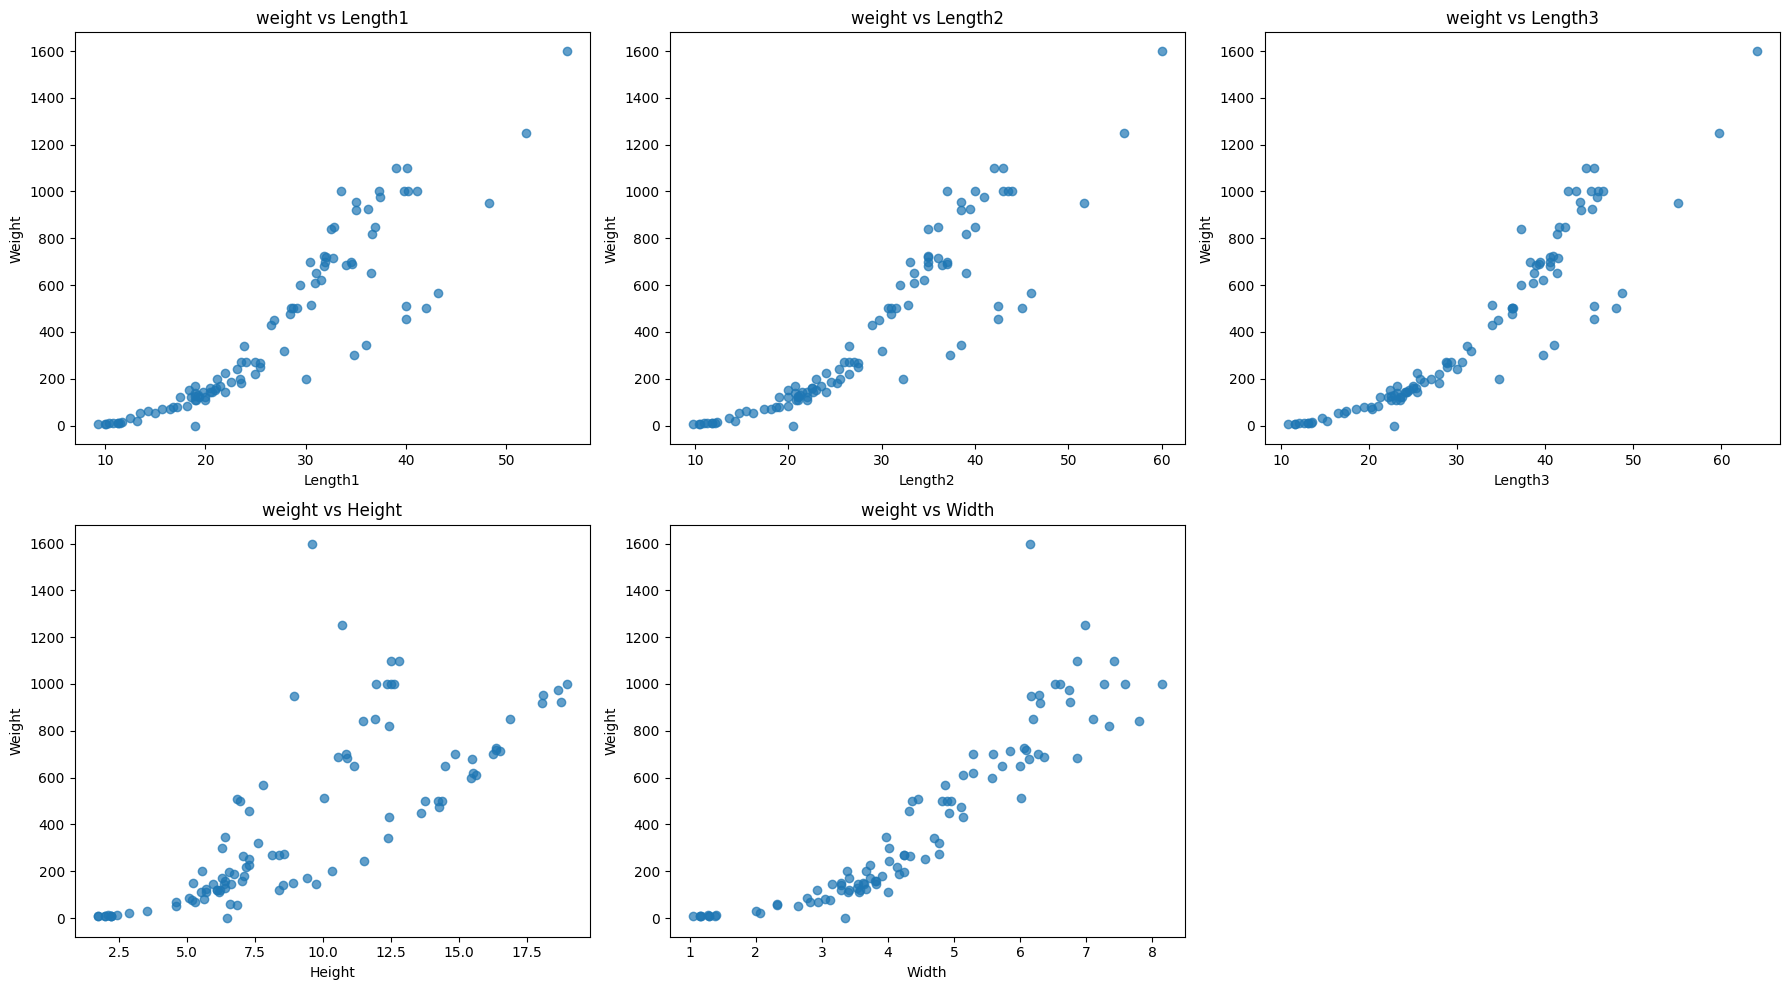

In [ ]:
plt.figure(figsize=(18,10))

for i in range(5):
  plt.subplot(2,3,i+1) #how we want to arrange each of the plots in the bigger plot
  plt.scatter(X_train[:,i],Y_train,alpha=0.7)
  plt.xlabel(features[i])
  plt.ylabel("Weight")
  plt.title(f"weight vs {features[i]}")

plt.tight_layout()
plt.show()

2. Making the Linear Regression model

In [ ]:
# #normalising training data
# X_train_norm, X_mean, X_std = normalize_features(X_train)

# # Normalize training target
# Y_train_norm, Y_mean, Y_std = normalize_target(Y_train)

# print(f"X_train mean: {X_mean}")
# print(f"X_train std: {X_std}")
# print(f"Y_train mean: {Y_mean:.2f}")
# print(f"Y_train std: {Y_std:.2f}")

X_train mean: [26.272    28.456    31.275     9.173473  4.422428]
X_train std: [ 9.99157725 10.73470372 11.65935997  4.52572823  1.73802685]
Y_train mean: 406.93
Y_train std: 358.90


In [ ]:
def iniitalise_parameters(n_features, w_init=None, b_init=0):
    if w_init is None:
        w = np.zeros(n_features)
    else:
        w = np.array(w_init, dtype=float)
    b = b_init
    return w, b

In [ ]:
#predicting values
def predict(X,w,b):
  return np.dot(X,w)+ b

In [ ]:
#cost function
def cost_function(y_pred,y):
  m=len(y)
  cost = (1/(2*m))*np.sum((y_pred-y)**2)
  return cost

In [ ]:
# computing the gradients
def gradients(X,y,y_pred):
  m=len(y)
  dw = (1/m) * np.dot(X.T,(y_pred-y))
  db = (1/m) * np.sum(y_pred-y)
  return dw,db

In [ ]:
def gradient_descent_alg(X, y, lr, iterations, w_init=None, b_init=0):
    m, n = X.shape
    w, b = iniitalise_parameters(n, w_init, b_init)

    loss_history = []

    for _ in range(iterations):
        y_pred = predict(X, w, b)
        loss = cost_function(y_pred, y)

        dw, db = gradients(X, y, y_pred)

        w = w - lr * dw
        b = b - lr * db

        loss_history.append(loss)

    return w, b, loss_history

MSE values from traing and test set

enter the learning rate: 1

1
Initial w=[0, 0, 0, 0, 0], b=0
Train MSE: nan
Test MSE: nan

2
Initial w=[1, -1, 0.5, 0, 0], b=0.5
Train MSE: nan
Test MSE: nan

3
Initial w=[-2, 2, -1, 1, 0], b=-1
Train MSE: nan
Test MSE: nan


/tmp/ipython-input-2781180606.py:4: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m))*np.sum((y_pred-y)**2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3844836328.py:13: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * dw
/tmp/ipython-input-3844836328.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - lr * db


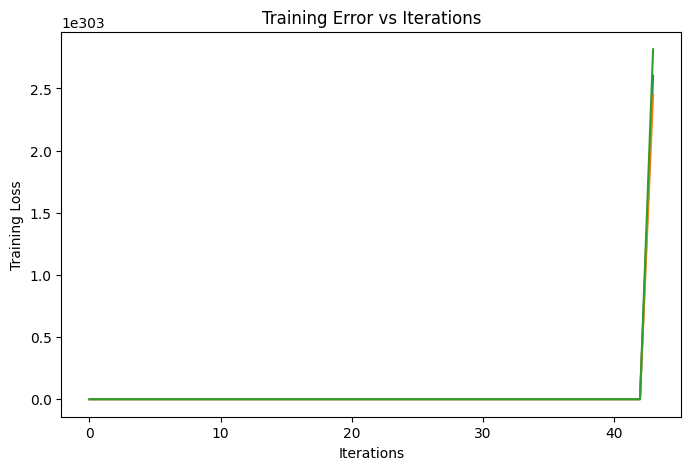

In [ ]:
input_lr = float(input("enter the learning rate: "))

X_test_part1 = X_Dr[100:]
Y_test_part1 = Y_Dr[100:]

initial_params = [
    ([0, 0, 0, 0, 0], 0),
    ([1, -1, 0.5, 0, 0], 0.5),
    ([-2, 2, -1, 1, 0], -1)
]

plt.figure(figsize=(8,5))

for i, (w_init, b_init) in enumerate(initial_params):

    w_optimal, b_optimal, train_loss = gradient_descent_alg(X_train,Y_train,input_lr,100,w_init,b_init)

    train_mse = train_loss[-1]

    y_test_pred = predict(X_test_part1, w_optimal, b_optimal)
    test_mse = cost_function(y_test_pred, Y_test_part1)

    print(f"\n{i+1}")
    print(f"Initial w={w_init}, b={b_init}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")

    plt.plot(train_loss,label="")

plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.title("Training Error vs Iterations")
plt.show()



plot of train_loss vs iterations

optimal weight and bias:

In [ ]:
print(f"optimal weight is {w_optimal}")
print(f"optimal bais is {b_optimal}")

optimal weight is [ 27.46882897  12.92425723 -26.62650758  26.10613667  14.20934464]
optimal bais is -105.94527349411264


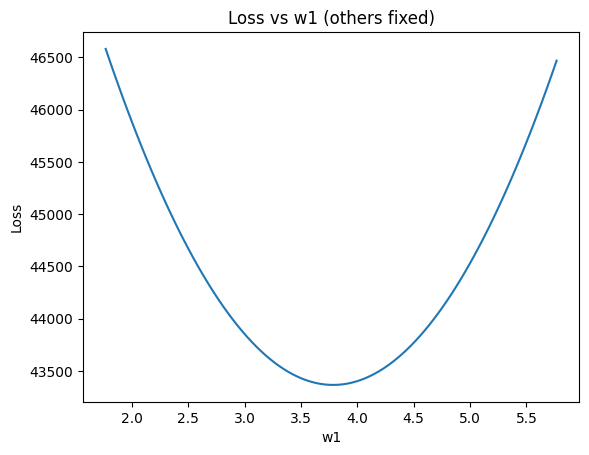

In [ ]:
w1_vals = np.linspace(w_optimal[0] - 2, w_optimal[0] + 2, 100)
loss_w1 = []

for w1 in w1_vals:
    w_temp = w_optimal.copy()
    w_temp[0] = w1
    y_pred = X_train @ w_temp + b_optimal
    loss = np.mean((y_pred - Y_train) ** 2)
    loss_w1.append(loss)

plt.figure()
plt.plot(w1_vals, loss_w1)
plt.xlabel("w1")
plt.ylabel("Loss")
plt.title("Loss vs w1 (others fixed)")
plt.show()


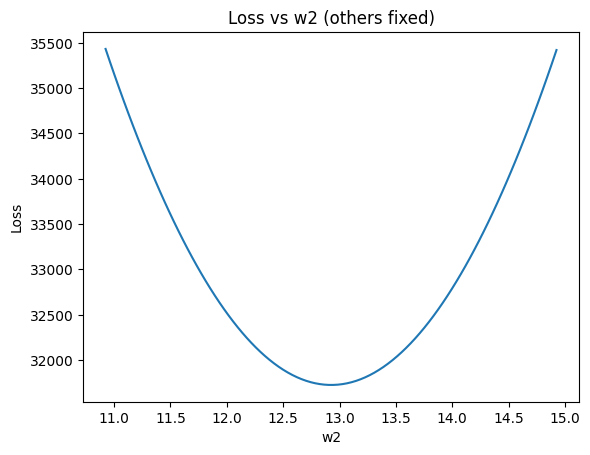

In [ ]:
w2_vals = np.linspace(w_optimal[1] - 2, w_optimal[1] + 2, 100)
loss_w2 = []

for w2 in w2_vals:
    w_temp = w_optimal.copy()
    w_temp[1] = w2
    y_pred = X_train @ w_temp + b_optimal
    loss = np.mean((y_pred - Y_train) ** 2)
    loss_w2.append(loss)

plt.figure()
plt.plot(w2_vals, loss_w2)
plt.xlabel("w2")
plt.ylabel("Loss")
plt.title("Loss vs w2 (others fixed)")
plt.show()

part 2:

In [ ]:
# X_val_norm = (X_val - X_mean) / X_std
# Y_val_norm = (Y_val - Y_mean) / Y_std

# X_test_norm = (X_test - Y_mean) / Y_std
# Y_test_norm = (Y_test - Y_mean) / Y_std

In [ ]:
learning_rates = [0.0001, 0.0003, 0.0005]
best_lr = None
best_val_mse = float("inf")
best_b = None
best_w = None
results = []

for lr in learning_rates:
  # w,b,loss_history = gradient_descent_alg(X_train_norm,Y_train_norm,lr,10000)
  w,b,loss_history = gradient_descent_alg(X_train,Y_train,lr,10000)

  # Y_val_pred = predict(X_val_norm,w,b)
  # val_mse = cost_function(Y_val_pred,Y_val_norm)
  Y_val_pred = predict(X_val,w,b)
  val_mse = cost_function(Y_val_pred,Y_val)

  results.append((lr, val_mse))

  print(f"Learning Rate: {lr}, Validation MSE: {val_mse:.6f}")

  if val_mse < best_val_mse:
    best_val_mse = val_mse
    best_lr = lr
    best_b = b
    best_w = w

Learning Rate: 0.0001, Validation MSE: 30037.446099
Learning Rate: 0.0003, Validation MSE: 24417.745881
Learning Rate: 0.0005, Validation MSE: 20513.554868


In [ ]:
print("Best Learning Rate Selected:")
print(f"Learning Rate = {best_lr}")
print(f"Validation MSE = {best_val_mse}")
print(f"Best b = {best_b}")
print(f"Best w = {best_w}")

Best Learning Rate Selected:
Learning Rate = 0.0005
Validation MSE = 20513.55486804621
Best b = -220.26764673968634
Best w = [ 50.63548486  11.13949294 -43.57959304  35.16005383  11.71660914]


In [ ]:
#testing with and without tuning


# Y_test_pred_no = predict(X_test_norm,w_optimal,b_optimal)
# test_mse_no = cost_function(Y_test_pred_no,Y_test_norm)

#for test set without hyperparameter tuning:
Y_test_pred_no = predict(X_test,w_optimal,b_optimal)
test_mse_no = cost_function(Y_test_pred_no,Y_test)

# for test with hyperparameter tuning:
Y_test_pred = predict(X_test,best_w,best_b)
test_mse = cost_function(Y_test_pred,Y_test)

print(f"Test MSE without tuning: {test_mse_no}")
print(f"Test MSE with tuning: {test_mse}")
improvement = ((test_mse_no - test_mse) / test_mse) * 100
print(f"Improvement: {improvement:.2f}%")

Test MSE without tuning: 10973.845191765422
Test MSE with tuning: 7259.7649228432
Improvement: 51.16%
